# Examples

Here are examples showing solutions to various problems using pytorch. Here are examples I have created or taken from somewhere.

In [1]:
import torch
from torch import nn, optim

from pathlib import Path
from random import sample
import matplotlib.pyplot as plt

## Linear regression

Linear regression can be represented as a single linear layer in a neural network. Let's consider a simple exercise - building linear regression with PyTorch. 

### Data

Consider the data used in this example.

The following cell generates random  $X$ and $y = Xw+b+\varepsilon$. Here:

- $w$: true value weights of the features.
- $b$: bias.
- $\varepsilon \sim N(0,1)$: random noise.

$w$ and $b$ are also generated values. We'll investigate how well we can reproduce them using PyTorch. 

In [2]:
n_features = 5
n_objects = 10_000

w_true = torch.randn(n_features)
bias_true = torch.normal(5, 1, size=(1,))

X = torch.rand(n_objects, n_features)
Y = X @ w_true + bias_true + torch.normal(0, 1, size=(n_objects,))

Lets wathc at what we got.

In [3]:
X[:5], Y[:5]

(tensor([[0.9013, 0.8299, 0.0648, 0.2610, 0.1127],
         [0.4858, 0.3008, 0.3360, 0.3647, 0.3504],
         [0.3301, 0.7974, 0.6802, 0.2350, 0.6761],
         [0.3001, 0.4789, 0.1461, 0.6243, 0.0102],
         [0.4758, 0.3183, 0.7421, 0.7753, 0.6531]]),
 tensor([3.5923, 4.4436, 6.2621, 4.3530, 6.1287]))

### Fit model

The following cell defines and fits the model to the generated data. 

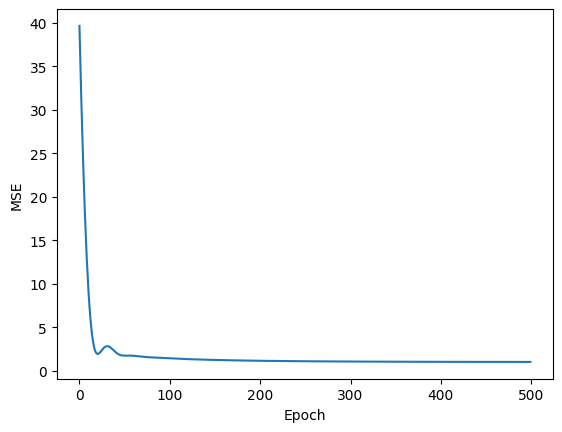

In [4]:
net = nn.Linear(in_features = n_features, out_features = 1, bias = True)

optimizer = optim.Adam(net.parameters(), lr = 0.1)
loss_fn = nn.MSELoss()
loss_values = []

for i in range(500):
    
    optimizer.zero_grad()
    # forward path
    output = net(X)
    # loss compution
    loss_val = loss_fn(output.ravel(), Y)
    loss_values.append(loss_val.item())
    # packward path
    loss_val.backward()
    optimizer.step()

plt.plot(loss_values)
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.show()

Finally, let's check if the parameter estimations correspond to the actual values of the parameters. 

In [5]:
parameters = list(net.parameters())

print("True weights " , w_true)
print("Estimated weights", parameters[0].data)
print()
print("True bias ", bias_true)
print("Estimated bias ", parameters[1].data)

True weights  tensor([ 0.7783, -0.4558, -0.4043,  0.5330,  2.5738])
Estimated weights tensor([[ 0.7635, -0.3366, -0.3066,  0.5792,  2.6464]])

True bias  tensor([4.2397])
Estimated bias  tensor([4.0719])


## Symbols classification

Cosidered task of classification for pictures that contains symbols. Check at [this page](examples/symbols_classification.ipynb).

---

This cell demonstrates how to accomplish the task. It includes images labeled with descriptive titles. 

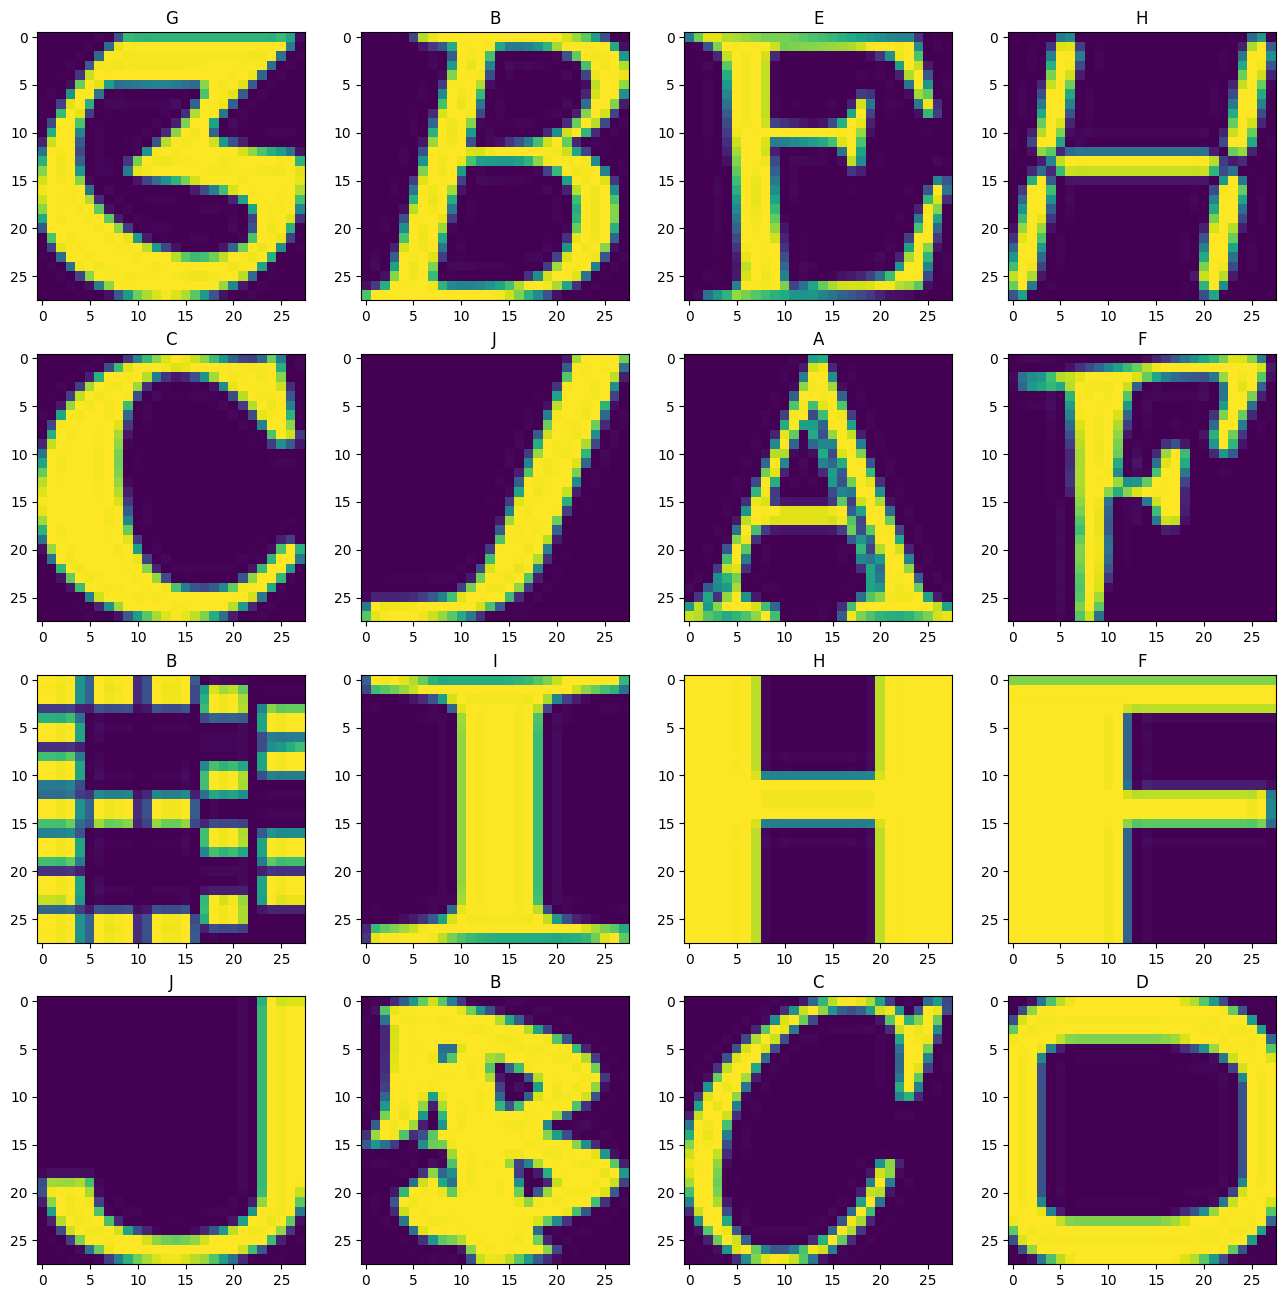

In [28]:
fig, ax = plt.subplots(4, 4, figsize=(16, 16))
data_folder_path = (
    Path("examples")/
    "symbols_classification_files"/
    "notMNIST_small"
)

iterator = enumerate(sample(list(data_folder_path.glob("**/*.png")), 16))
for i, img_path in iterator:
    
    img_label = img_path.parts[-2]
    try:
        image = plt.imread(img_path)
    except SyntaxError:
        continue
    
    row = i//4
    col = i%4

    ax[row][col].imshow(image)
    ax[row][col].set_title(f"{img_label}")